Caps categories found: ['0-10%' '10-25%' '25-40%' '60-75%' '40-60%']

Graph saved as 'Self-Assessment (Caps).png'


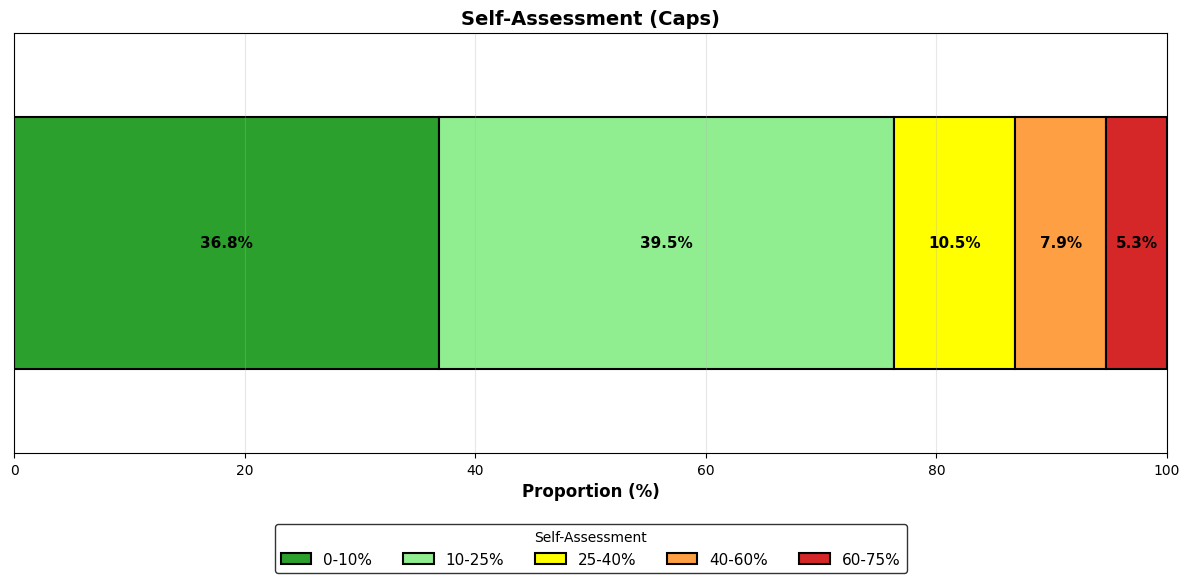


=== Self-Assessment Distribution ===

0-10%        | Count:  14 | Percentage:  36.84%
10-25%       | Count:  15 | Percentage:  39.47%
25-40%       | Count:   4 | Percentage:  10.53%
40-60%       | Count:   3 | Percentage:   7.89%
60-75%       | Count:   2 | Percentage:   5.26%

Total records with valid caps values: 38


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv('assignment_3_dataset.csv', index_col=0)

# Remove rows where caps is '??' or NaN
df_clean = df[df['caps'] != '??'].dropna(subset=['caps'])

# Extract the percentage ranges from caps column
caps_categories = df_clean['caps'].unique()
print(f"Caps categories found: {caps_categories}")

# Define color map for each category
color_map = {
    '60-75%': '#d62728',      # Red
    '40-60%': '#ff9f43',      # Orange
    '25-40%': '#ffff00',      # Yellow
    '10-25%': '#90ee90',      # Light Green
    '0-10%': '#2ca02c'        # Dark Green
}

# Count occurrences of each category
caps_counts = df_clean['caps'].value_counts().sort_index()

# Create data for stacked bar chart
categories = list(caps_counts.index)
values = list(caps_counts.values)
colors = [color_map.get(cat, '#cccccc') for cat in categories]

# Calculate proportions
total = sum(values)
proportions = [v / total * 100 for v in values]

# Create figure
fig, ax = plt.subplots(figsize=(12, 6))

# Create stacked horizontal bar chart
left = 0
for i, (cat, val, prop, color) in enumerate(zip(categories, values, proportions, colors)):
    ax.barh(0, prop, left=left, height=0.6, label=cat, color=color, edgecolor='black', linewidth=1.5)
    # Add text label in the middle of each segment
    if prop > 5:  # Only add text if segment is wide enough
        ax.text(left + prop/2, 0, f'{prop:.1f}%', ha='center', va='center',
               fontsize=11, fontweight='bold', color='black')
    left += prop

# Set labels and title
ax.set_xlabel('Proportion (%)', fontsize=12, fontweight='bold')
ax.set_title('Self-Assessment (Caps)', fontsize=14, fontweight='bold')
ax.set_xlim(0, 100)
ax.set_ylim(-0.5, 0.5)
ax.set_yticks([])
ax.grid(True, alpha=0.3, axis='x')

# Create legend
ax.legend(title='Self-Assessment', loc='upper center', bbox_to_anchor=(0.5, -0.15),
         ncol=5, fontsize=11, frameon=True, edgecolor='black')

plt.tight_layout()
plt.savefig('Self-Assessment (Caps).png', dpi=300, bbox_inches='tight')
print("\nGraph saved as 'Self-Assessment (Caps).png'")
plt.show()

# Print summary statistics
print("\n=== Self-Assessment Distribution ===\n")
for cat, val, prop in zip(categories, values, proportions):
    print(f"{cat:12} | Count: {val:3d} | Percentage: {prop:6.2f}%")
print(f"\nTotal records with valid caps values: {total}")